<a href="https://colab.research.google.com/github/joselvira/BiomecanicaPython/blob/master/Notebooks/Graficas_sofisticadas_especificas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gráficas sofisticadas específicas

A continuación veremos cómo crear algunas gráficas específicas que solucionan problemas particulares. Muchas de estas las crearemos con la librería Seaborn, que simplifica enormemente la creación de gráficas con fines estadísticos.

En la siguiente página existe un tutorial muy útil con criterios sobre qué tipo de gráfica elegir en función del tipo de datos que tenemos. Acceder desde https://www.data-to-viz.com/ 

Como siempre, empezamos importando las librerías que solemos utilizar.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importamos la librería principal que vamos a utilizar para realizar las gráficas, que es Seaborn.

In [2]:
import seaborn as sns
print(sns.__version__) #para que indique la versión de seaborn instalada en el entorno

0.11.2


Si la versión instalada no es la última, conviene actualizarla. Por ejemplo, desde el entorno de Colaboratory se puede hacer con el siguiente comando:

In [3]:
!pip install seaborn --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 6.3 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [4]:
import seaborn as sns
print('Ahora la versión de Seaborn es ', sns.__version__)

Ahora la versión de Seaborn es  0.11.2


# Gráfico de exploración general de bases de datos

Para explorar de un vistazo distintas variables agrupando por dos factores, por ejemplo.

Primero abrimos una base de datos de ejemplo:

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

urlDatos='https://raw.githubusercontent.com/joselvira/BiomecanicaPython/master/Datos/BasesDatos/BaseDatosDianas_Fake.xlsx'
nombreHoja = 'DatosVertical'

dfDatos = pd.read_excel(urlDatos, sheet_name=nombreHoja, index_col=None)
dfDatos.head()

,SujID,SujGrupo,Grupo,Tiempo,Sexo,Edad,Talla,Masa,Puntos,Equilibrio,Salto
0,1,1,Entrenado,pre,Mixto,13.508680,1.609190,53.265265,24,11.971867,21.572761
1,2,2,Entrenado,pre,Mixto,14.108241,1.614911,55.770581,31,11.103282,21.831651
2,3,3,Entrenado,pre,Mixto,15.127287,1.793211,59.538736,27,11.377356,21.788410
3,4,4,Entrenado,pre,Mixto,14.284315,1.804726,51.641111,22,12.275727,22.458442
4,5,5,Entrenado,pre,Mixto,13.285982,1.694118,56.992277,25,11.441037,22.107812


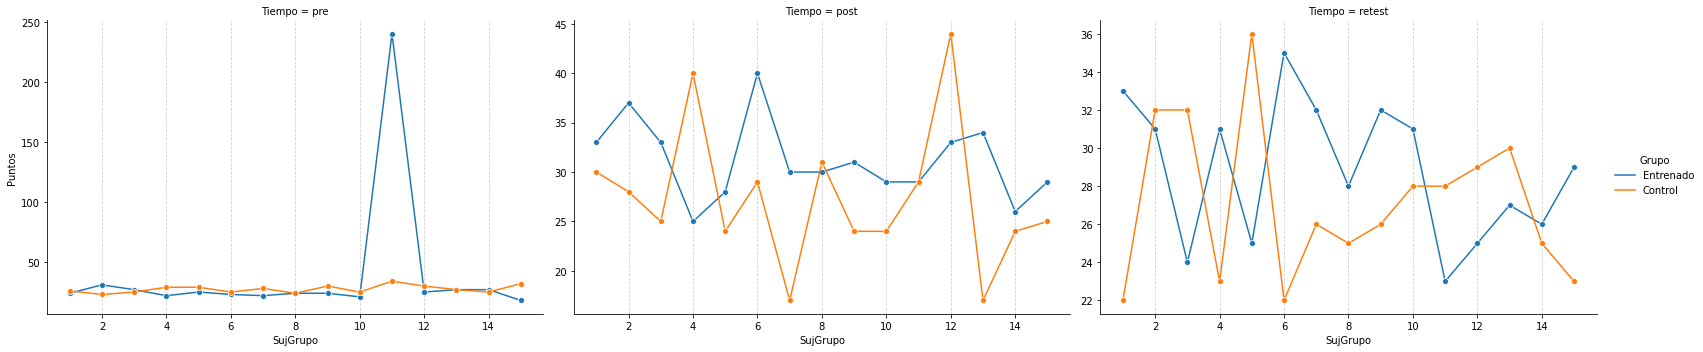

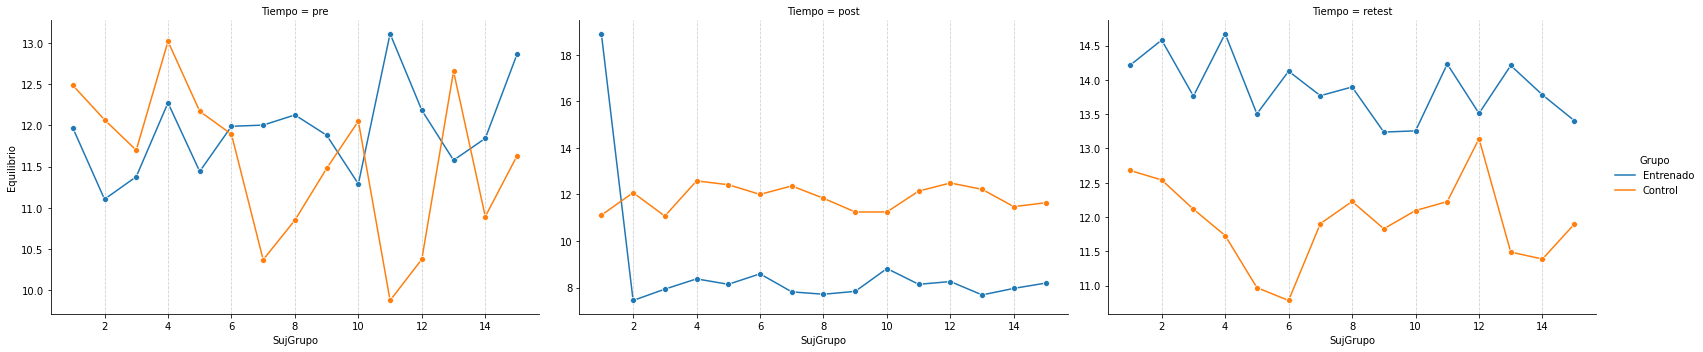

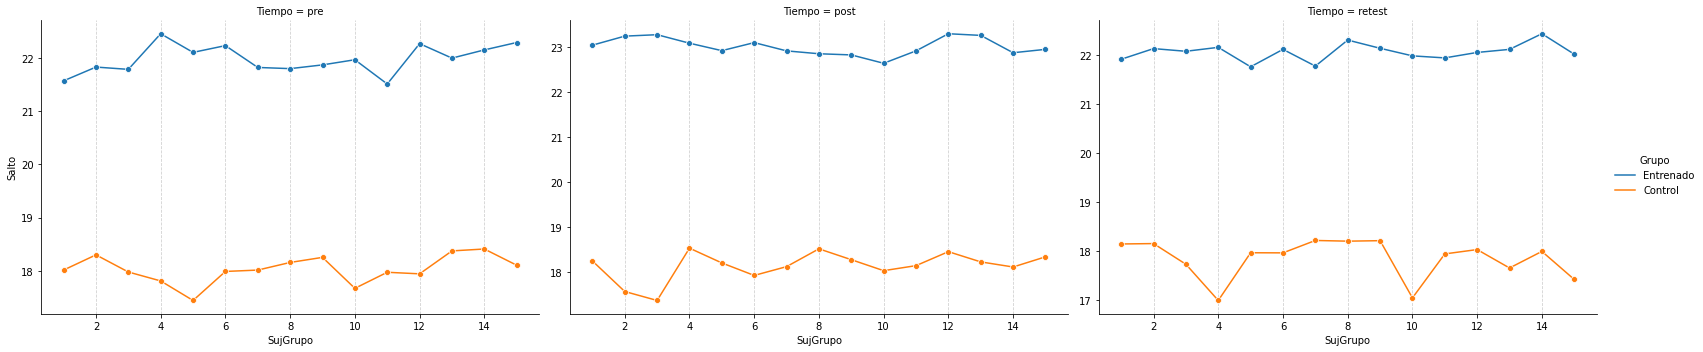

In [6]:
import matplotlib.ticker as ticker #para ajustar las etiquetas del eje x
for var in ['Puntos', 'Equilibrio',	'Salto']:
    g = sns.relplot(data=dfDatos, x='SujGrupo', y=var,
                     hue='Grupo', col='Tiempo',
                     kind='line', marker='o', height=5, aspect=1.5,
                     facet_kws={'sharey': False, 'sharex': True} #esto si se quiere que independice el eje Y
                    )
    #Se podrían poner líneas horizontales con la media de cada tipo
    #g.axes.flat[0].axhline(dfDatos[(dfDatos['Prepost']=='pre') & (dfDatos['Sexo']=='Hombre')][var].mean(), c='tab:blue')
    #g.axes.flat[0].axhline(dfDatos[(dfDatos['Prepost']=='post') & (dfDatos['Sexo']=='Hombre')][var].mean(), c='tab:orange')
    g.axes.flat[0].grid(axis='x', linestyle='--', alpha=0.6)
    g.axes.flat[0].xaxis.set_major_locator(ticker.MultipleLocator(2))
    #líneas con la media de cada lado en chicas
    #g.axes.flat[1].axhline(dfAngulos[(dfAngulos['Dominancia']=='D') & (dfAngulos['Sexo']=='H')][var].mean(), c='tab:blue')
    #g.axes.flat[1].axhline(dfAngulos[(dfAngulos['Dominancia']=='ND') & (dfAngulos['Sexo']=='H')][var].mean(), c='tab:orange')
    #g.axes.flat[1].xaxis.set_major_formatter(ticker.ScalarFormatter())
    g.axes.flat[1].grid(axis='x', linestyle='--', alpha=0.6)
    g.axes.flat[2].grid(axis='x', linestyle='--', alpha=0.6)

## Gráfico de exploración de variables intragrupo e intergrupo

Cargamos una base de datos de ejemplo, con datos de grupo entrenado y no entrenado y pre y post.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Cargar la base de datos de ejemplo
urlDatos='https://raw.githubusercontent.com/joselvira/BiomecanicaPython/master/Datos/BasesDatos/BaseDatosDianas_Fake.xlsx'
nombreHoja = 'DatosHorizontal'

dfDatos = pd.read_excel(urlDatos, sheet_name=nombreHoja, index_col=None)
dfDatos.head()

,SujID,Grupo,Edad,Talla,Masa,Puntos_pre,Equilibrio_pre,Salto_pre,Puntos_post,Equilibrio_post,Salto_post,Puntos_retest,Equilibrio_retest,Salto_retest
0,1,Entrenado,13.508680,1.609190,53.265265,24,11.971867,21.572761,33,40.906041,23.049010,33,14.211841,21.909154
1,2,Entrenado,14.108241,1.614911,55.770581,31,11.103282,21.831651,37,7.443853,23.249798,31,14.580621,22.126124
2,3,Entrenado,15.127287,1.793211,59.538736,27,11.377356,21.788410,33,7.930517,23.281648,24,13.763388,22.071827
3,4,Entrenado,14.284315,1.804726,51.641111,22,12.275727,22.458442,25,8.371687,23.092659,31,14.672547,22.151674
4,5,Entrenado,13.285982,1.694118,56.992277,25,11.441037,22.107812,28,8.138590,22.927019,25,13.504805,21.755714


Por ejemplo, comparamos el pre y post del grupo de entrenados, y nos fijamos en la variable Equilibrio.

In [8]:
dfComp = dfDatos[dfDatos['Grupo']=='Entrenado'][['Salto_pre', 'Salto_post']]
dfComp

,Salto_pre,Salto_post
0,21.572761,23.049010
1,21.831651,23.249798
2,21.788410,23.281648
3,22.458442,23.092659
4,22.107812,22.927019
5,22.235000,23.105766
6,21.824378,22.921988
7,21.802244,22.858167
8,21.872469,22.832338
9,21.969301,22.646438


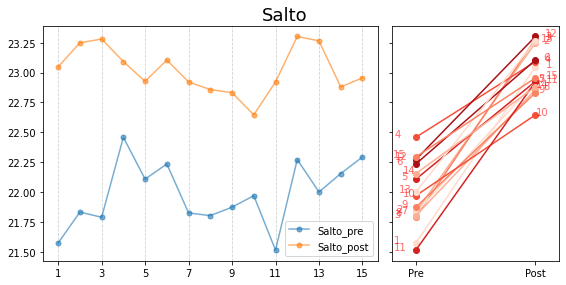

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(8,4), gridspec_kw = {'width_ratios':[2, 1]}, sharey=True)
#gráfica comparando las dos condiciones
dfComp.iloc[:, :].plot(marker='o',markersize=5, alpha=0.6, ax=ax[0])
ax[0].set_xticks(dfComp.index[::2].values) #pone como eje x el nº del sujeto
ax[0].set_xticklabels(dfComp.index[::2].values+1)
ax[0].grid(axis='x', linestyle='--', alpha=0.6)
#ax[0].legend(labels=['Pre', 'Post']) #esto por si se quiere ajustar a mano las etiquetas de la leyenda

#gráfica comparando sujeto a sujeto
dfComp.iloc[:, :].T.plot(ax=ax[1], marker='o', color=sns.color_palette('Reds'), legend=False)
#escribe al lado el nº de sujeto
for i in range(dfComp.dropna().shape[0]):
    desfase=np.random.rand()*(0.2-0.1)+0.1
    ax[1].text(0.0-desfase, dfComp.dropna().iloc[i,0], dfComp.dropna().index[i]+1, color='r', alpha=.6, transform=ax[1].transData)
    ax[1].text(0.9+desfase, dfComp.dropna().iloc[i,1], dfComp.dropna().index[i]+1, color='r', alpha=.6, transform=ax[1].transData)
ax[1].set_xlim([-0.2, 1.2])
ax[1].set_xticks([0,1])
ax[1].set_xticklabels(['Pre', 'Post'])

plt.tight_layout(rect=[0, 0, 1, 0.95]) #ajusta automáticamente los espacios entre gráficas
plt.suptitle(dfComp.columns[0][:-4], fontsize=18)
plt.show()

## Gráfica con histogramas de un conjunto de variables

Es frecuente necesitar valorar la distribución normal en un conjunto de datos. Existen varias formas de generar gráficos de histogramas, pero normalmente están hechos para una sola variable. Vamos a ver dos formas de solucionarlo para poder sacar una figura con histogramas de las variables de un dataframe completo.
Para hacer pruebas, creamos una base de datos aleatoria con bastantes variables.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(3)
numVars = 9
numSujetos = 30
media_vars = np.random.rand(numVars)*(90-10)+10 #np.random.randint(10, 90, numVars)
SD_vars = np.random.rand(numVars)*(30-5)+5
varis=[]
for i in range(numVars):
    varis.append(np.random.normal(media_vars[i], SD_vars[i], numSujetos))
    
df=pd.DataFrame(varis).T
df.columns=['var'+str(x) for x in range(1, numVars+1)]

#Añade una columna con el sexo
df['Sexo'] = np.random.choice(['V', 'H'], p=[0.6,0.4],size=numSujetos)
df.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,Sexo
0,45.327032,61.629707,43.833654,39.602692,75.965920,49.136162,59.362389,11.544038,1.998649,V
1,29.288885,66.822588,37.362590,35.358150,91.714668,112.561354,43.675005,26.682578,1.702235,V
2,69.801600,53.731301,10.352783,64.559972,75.152445,58.250802,18.163828,29.726105,65.566286,V
3,36.424458,65.113024,56.124640,57.512042,61.391510,89.827863,9.623495,24.934164,26.021404,H
4,35.079095,72.474495,10.764855,39.898496,70.592102,100.604968,13.688590,32.708992,13.093913,H


### Opción 1

Consiste en crear un subplot e ir metiendo en cada uno un histograma hecho con Seaborn.

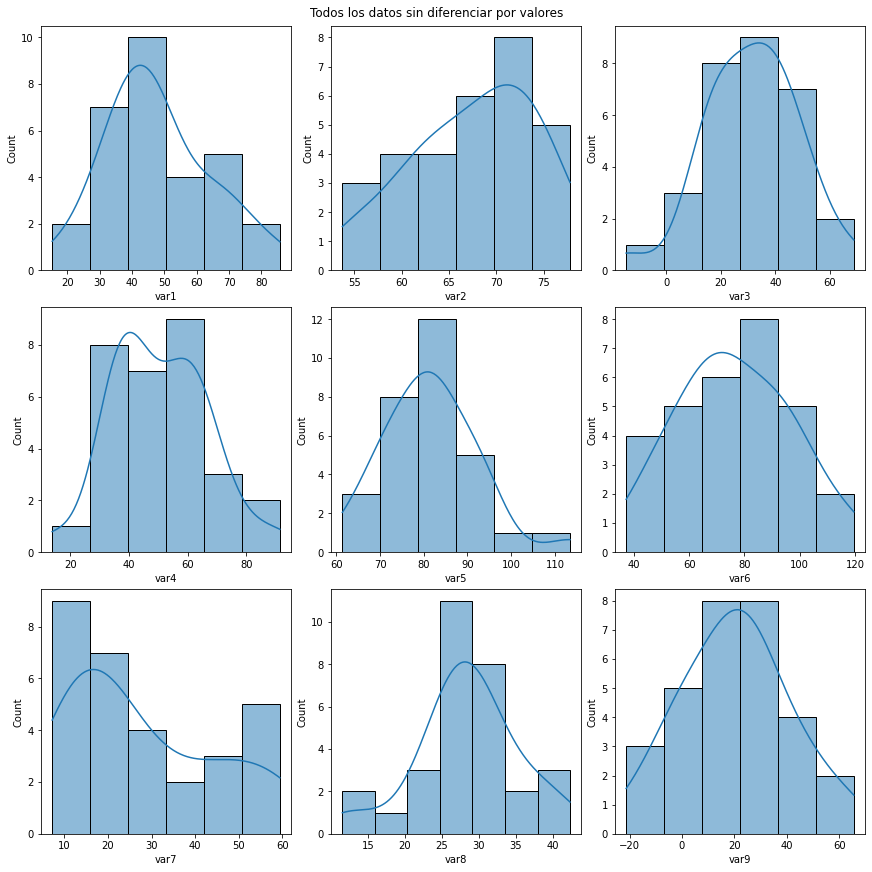

In [11]:
fig, axs = plt.subplots(3, 3, constrained_layout=True, figsize=(12, 12))
for num, var in enumerate(df.columns[:-1]):
    sns.histplot(df[var], kde=True, ax=axs.flat[num])
    
plt.suptitle('Todos los datos sin diferenciar por valores')
plt.show()

De esta forma, para separar por agún factor se debe hacer a mano.

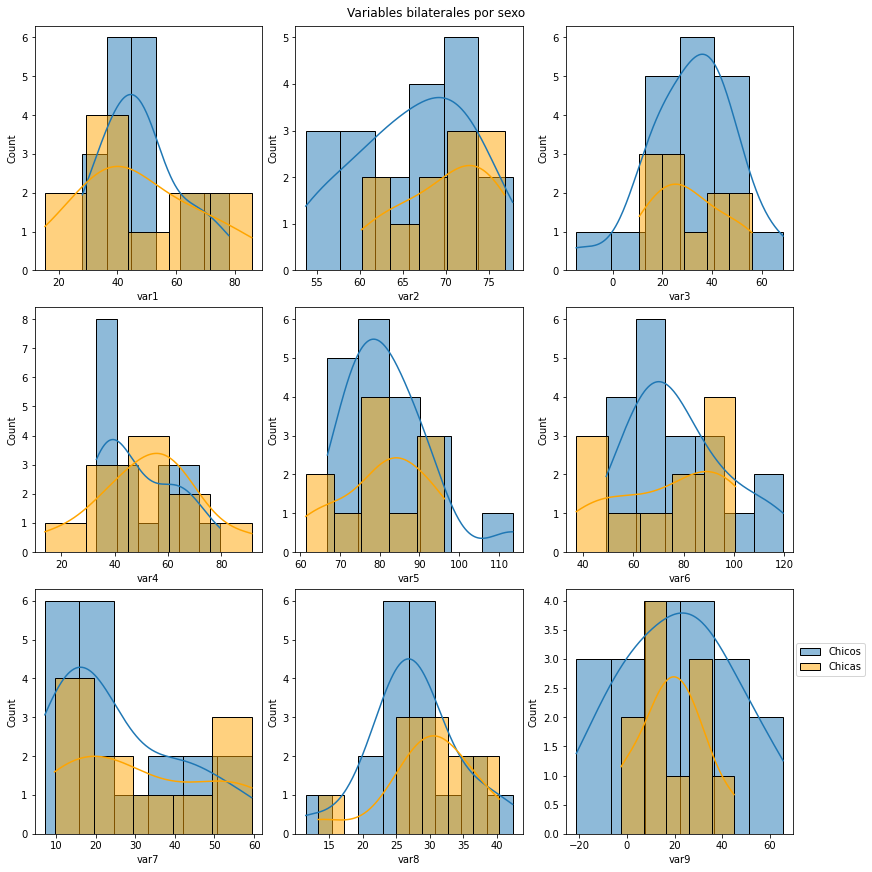

In [12]:
fig, axs = plt.subplots(3, 3, constrained_layout=True, figsize=(12, 12))
for num, var in enumerate(df.columns[:-1]):
    sns.histplot(df[df['Sexo']=='V'][var], kde=True, label='Chicos', ax=axs.flat[num])
    sns.histplot(df[df['Sexo']=='H'][var], kde=True, label='Chicas', color='orange', ax=axs.flat[num])
    
    #axs.flat[num].text(0.75, 0.9, 'OS p={0:.3f}'.format(normBilat_V['pval'][num]), fontsize=10, transform=axs.flat[num].transAxes)
    #axs.flat[num].text(0.75, 0.85, 'AS p={0:.3f}'.format(normBilat_H['pval'][num]), fontsize=10, transform=axs.flat[num].transAxes)

plt.legend(fontsize=10, bbox_to_anchor=(.99,0.8), bbox_transform=axs.flat[-1].transAxes) #ajusta el tamaño de la letra y la posición del cuadro. Aquí por ejemplo lo coloca fuera del gráfico a la derecha
plt.suptitle('Variables bilaterales por sexo')
plt.show()

### Opción 2

En este caso usaremos opciones de Seaborn, que pueden ser buena para manejar agrupaciones por factores.

Primero tenemos que colocar todas las variables como un factor en vertical en una sola columna.

In [13]:
df2= pd.melt(df, id_vars='Sexo', value_vars=df.iloc[:, :-1], value_name='value')
df2

,Sexo,variable,value
0,V,var1,45.327032
1,V,var1,29.288885
2,V,var1,69.801600
3,H,var1,36.424458
4,H,var1,35.079095
...,...,...,...
265,H,var9,13.222746
266,V,var9,25.814692
267,H,var9,-1.773625
268,V,var9,49.008574


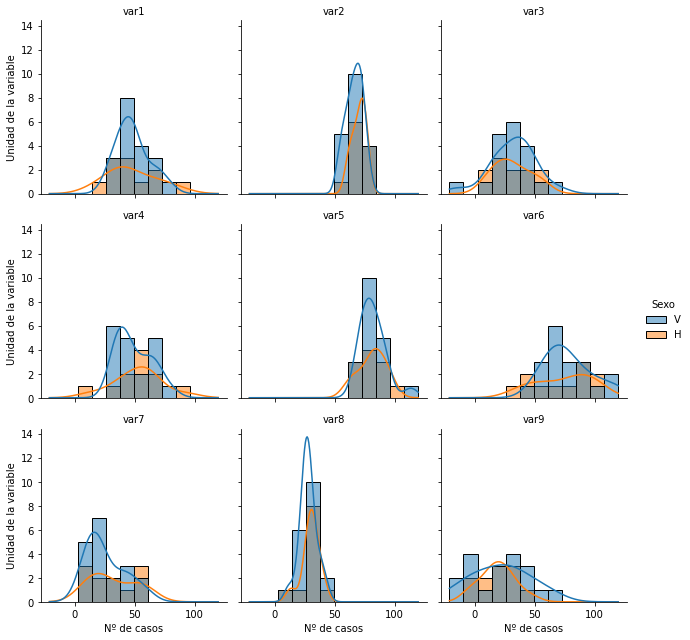

In [14]:
g=sns.displot(data=df2, x='value', hue='Sexo', col='variable', kde=True, col_wrap=3, height=3)
g.set_axis_labels('Nº de casos', 'Unidad de la variable')
g.set_titles('{col_name}') #para que no ponga por defecto en cada subgráfico: variable=...

## Anotaciones con diferencias significativas

Opción para crear líneas que indiquen las diferencias entre grupos en gráficas de barras o de caja.

Más ejemplos en https://github.com/trevismd/statannotations

Hay que instalar el módulo statannotations.



In [15]:
!pip install statannotations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 KB 9.0 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Thur vs. Fri: Mann-Whitney-Wilcoxon test two-sided, P_val:6.477e-01 U_stat=6.305e+02
Fri vs. Sat: Mann-Whitney-Wilcoxon test two-sided, P_val:1.276e-01 U_stat=6.410e+02
Sat vs. Sun: Mann-Whitney-Wilcoxon test two-sided, P_val:3.585e-01 U_stat=3.030e+03
Thur vs. Sat: Mann-Whitney-Wilcoxon test two-sided, P_val:4.690e-02 U_stat=2.180e+03
Fri vs. Sun: Mann-Whitney-Wilcoxon test two-sided, P_val:2.680e-02 U_stat=4.835e+02
Thur vs. Sun: Mann-Whitney-Wilcoxon test two-sided, P_val:5.363e-03 U_stat=1.705e+03


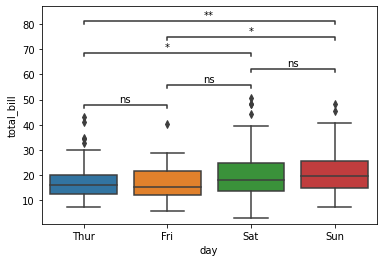

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannotations.Annotator import Annotator

df = sns.load_dataset("tips")
x = "day"
y = "total_bill"
order = ['Thur', 'Fri', 'Sat', 'Sun']

ax = sns.boxplot(data=df, x=x, y=y, order=order)

pairs=[('Sun', 'Thur'), ('Thur', 'Fri'), ('Thur', 'Sat'), ('Fri', 'Sat'), ('Fri', 'Sun'), ('Sat', 'Sun')]

annotator = Annotator(ax, pairs, data=df, x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', verbose=1)
g, test_results = annotator.apply_and_annotate()

#plt.savefig('example_non-hue_outside.png', dpi=300, bbox_inches='tight')

También se puede acceder a los resultados del test, guardados en la variable *test_results*.

In [17]:
for res in test_results:
    print(res.data)

print("\nStatResult attributes:", test_results[0].data.__dict__.keys())

Mann-Whitney-Wilcoxon test two-sided, P_val:6.477e-01 U_stat=6.305e+02
Mann-Whitney-Wilcoxon test two-sided, P_val:1.276e-01 U_stat=6.410e+02
Mann-Whitney-Wilcoxon test two-sided, P_val:3.585e-01 U_stat=3.030e+03
Mann-Whitney-Wilcoxon test two-sided, P_val:4.690e-02 U_stat=2.180e+03
Mann-Whitney-Wilcoxon test two-sided, P_val:2.680e-02 U_stat=4.835e+02
Mann-Whitney-Wilcoxon test two-sided, P_val:5.363e-03 U_stat=1.705e+03

StatResult attributes: dict_keys(['test_description', 'test_short_name', 'stat_str', 'stat_value', 'pvalue', '_corrected_significance', '_correction_method', 'alpha', 'group1', 'group2'])


Otro ejemplo con categorías. Se crean unos datos.

In [18]:
df = sns.load_dataset('diamonds')
df = df[df['color'].map(lambda x: x in 'EIJ')]
# Modifying data to yield unequal boxes in the hue value
df.loc[df['cut'] == 'Ideal', 'price'] = df.loc[df['cut'] == 'Ideal', 'price'].map(lambda x: min(x, 5000))
df.loc[df['cut'] == 'Premium', 'price'] = df.loc[df['cut'] == 'Premium', 'price'].map(lambda x: min(x, 7500))
df.loc[df['cut'] == 'Good', 'price'] = df.loc[df['cut'] == 'Good', 'price'].map(lambda x: min(x, 15000))
df.loc[df['cut'] == 'Very Good', 'price'] = df.loc[df['cut'] == 'Very Good', 'price'].map(lambda x: min(x, 3000))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

E_Ideal vs. E_Premium: Mann-Whitney-Wilcoxon test two-sided, P_val:1.560e-31 U_stat=3.756e+06
I_Ideal vs. I_Premium: Mann-Whitney-Wilcoxon test two-sided, P_val:5.141e-61 U_stat=1.009e+06
J_Ideal vs. J_Premium: Mann-Whitney-Wilcoxon test two-sided, P_val:4.018e-37 U_stat=2.337e+05
E_Ideal vs. E_Good: Mann-Whitney-Wilcoxon test two-sided, P_val:5.201e-19 U_stat=1.480e+06
I_Ideal vs. I_Good: Mann-Whitney-Wilcoxon test two-sided, P_val:5.008e-13 U_stat=4.359e+05
J_Ideal vs. J_Good: Mann-Whitney-Wilcoxon test two-sided, P_val:1.006e-04 U_stat=1.174e+05
E_Ideal vs. E_Very Good: Mann-Whitney-Wilcoxon test two-sided, P_val:1.736e-02 U_stat=4.850e+06
E_Good vs. I_Ideal: Mann-Whitney-Wilcoxon test two-sided, P_val:5.906e-01 U_stat=9.882e+05
I_Premium vs. J_Ideal: Mann-Whitney-Wilcoxon test two-sided, P_val:5.159e-27 

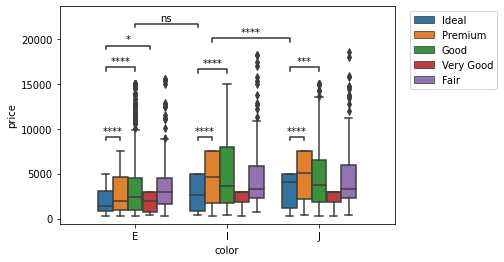

In [19]:
x = "color"
y = "price"
hue = "cut"
hue_order=['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
order = ["E", "I", "J"]
pairs=[
    (("E", "Ideal"), ("E", "Very Good")),
    (("E", "Ideal"), ("E", "Premium")),
    (("E", "Ideal"), ("E", "Good")),
    (("I", "Ideal"), ("I", "Premium")),
    (("I", "Ideal"), ("I", "Good")),
    (("J", "Ideal"), ("J", "Premium")),
    (("J", "Ideal"), ("J", "Good")),
    (("E", "Good"), ("I", "Ideal")),
    (("I", "Premium"), ("J", "Ideal")),
    ]
ax = sns.boxplot(data=df, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
annotator = Annotator(ax, pairs, data=df, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
annotator.configure(test='Mann-Whitney', verbose=2)
annotator.apply_test()
annotator.annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
#plt.savefig('example_hue_layout.png', dpi=300, bbox_inches='tight')

# Gráficas para explorar relaciones bivariadas


## Gráficas para explorar relaciones bivariadas (I)

Primero creamos una variable aleatoria, que podría ser altura en centímetros, y luego crea otra variable basada en la anterior y le suma un valor aleatorio, con lo que tienen una cierta correlación.

Debajo se crea el gráfico. Ejecutando varias veces la celda, se puede ver cómo crea las variables aleatoriamente y va cambiando el gráfico que muestra su correlación.

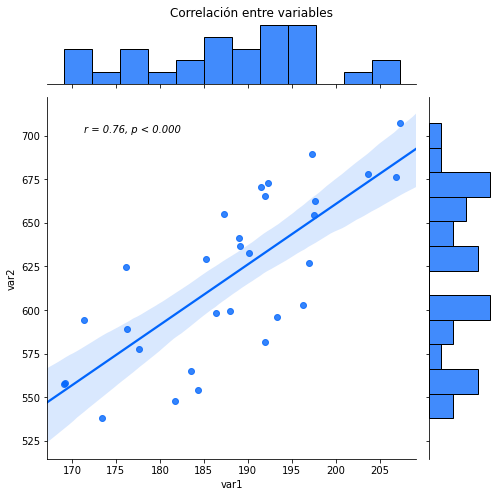

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

# Se crean variables aleatorias y dos con correlación
#np.random.seed(5) #si se quiere fijar la aleatoriedad
numSujetos = 30
media_var1 = np.random.rand(1)*(190-160)+160
SD_var1 = np.random.rand(1)*(10-8)+8
    
df=pd.DataFrame(np.random.normal(media_var1, SD_var1, numSujetos), columns=['var1'])

#crea algunas variables con correlación forzada
df['var2']=df.iloc[:, 0]*3 +np.random.rand(numSujetos)*100#esta variable es proporcional a la primera

#como ejemplo rápido, calcula la correlación de Pearson entre las dos variables para incluirla en el gráfico
r, p= pearsonr(df['var1'], df['var2'])


#Crea el gráfico
g = sns.JointGrid(data=df, x='var1', y='var2', height=7)
g = g.plot_joint(sns.regplot, order=1, truncate=False, color="xkcd:bright blue") #con order se puede controlar el exponente del polinomio de ajuste
g = g.plot_marginals(sns.histplot, kde=False, bins=12, color="xkcd:bright blue")
g.ax_joint.text(0.1, 0.9, 'r = {0:.2f}, p < {1:.3f}'.format(r, p), fontstyle='italic', transform=g.ax_joint.transAxes)
g.fig.suptitle('Correlación entre variables')
#g.fig.tight_layout()# si se activa este no tiene efecto el dejar espacio para el título
g.fig.subplots_adjust(top=0.95) #baja un poco la ventana de la gráfica para que quepa el título
plt.show()

## Gráficas para explorar relaciones bivariadas (II)


Para observar de un vistazo correlaciones entre pares de variables.

Primero cargamos una base de datos de ejemplo con tres variables.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

urlDatos='https://raw.githubusercontent.com/joselvira/BiomecanicaPython/master/Datos/BasesDatos/BaseDatosSaltoFactores_Fake.xlsx'
nombreHoja = 'Datos'

Datos = pd.read_excel(urlDatos, sheet_name=nombreHoja, index_col=None)
Datos.head()


,nº,Edad,Talla,Masa,Sexo,Grupo,Prepost,HCMJ,HSJ
0,1,23.794470,2.086830,74.274673,Hombre,Entrenado,pre,38.916430,48.380424
1,2,24.302798,1.871651,77.028427,Hombre,Entrenado,pre,39.853706,36.873923
2,3,23.041089,1.691582,75.242847,Hombre,Entrenado,pre,34.445890,39.361161
3,4,20.154899,1.758380,74.575467,Hombre,Entrenado,pre,44.264704,27.049540
4,5,20.179277,1.746612,75.645515,Hombre,Entrenado,pre,35.337067,35.277687


Y ahora se crea el gráfico, que es una cuadrícula con las variables indicadas.

**Hay que tener cuidado** con este tipo de gráficos porque cuando se hace con muchas variables tarda mucho en ejecutarse.

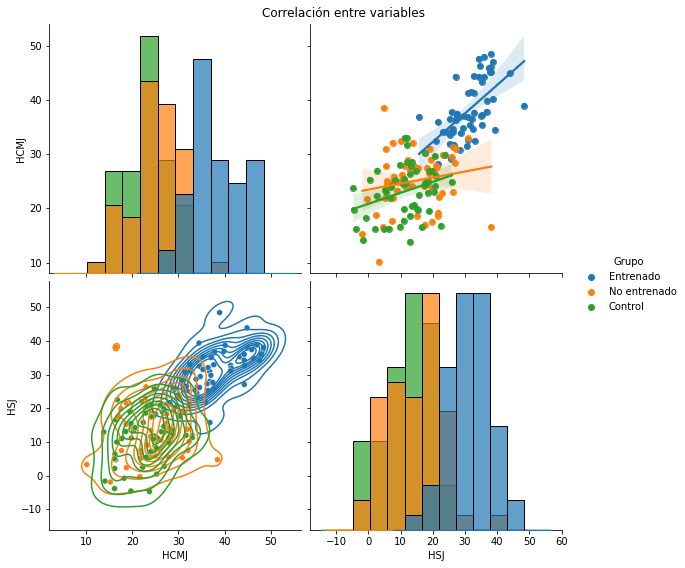

In [22]:
g = sns.pairplot(Datos, vars=['HCMJ', 'HSJ'], hue='Grupo', height=4) #con este saca la recta de regresión        
g.map_upper(sns.regplot) #tipo de gráficas por encima de la diagonal
g.map_lower(sns.kdeplot) #tipo de gráficas por debajo de la diagonal
g.map_diag(sns.histplot, edgecolor='k', alpha=0.7) #histograma en la diagonal
g.fig.subplots_adjust(top=0.95) #baja un poco la ventana de la gráfica para que quepa el título
g.fig.suptitle('Correlación entre variables')
plt.show()

## Gráficas para explorar relaciones bivariadas (III)

Para observar de un vistazo correlaciones entre pares de variables. En este caso se crea un mapa de calor que representa las correlaciones.

Primero creamos una base de datos de ejemplo con unas cuantas variables, algunas de ellas que estén relacionadas.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(5)
numVars = 8
numSujetos = 30
media_vars = np.random.rand(numVars)*(90-10)+10 #np.random.randint(10, 90, numVars)
SD_vars = np.random.rand(numVars)*(30-5)+5
varis=[]
for i in range(numVars):
    varis.append(np.random.normal(media_vars[i], SD_vars[i], numSujetos))
    
df=pd.DataFrame(varis).T
df.columns=['var'+str(x) for x in range(1, numVars+1)]
#crea algunas variables con correlación forzada
df['var'+str(numVars+1)]=df.iloc[:, 0]*3 #esta variable es proporcional a la primera
df['var'+str(numVars+2)]=df.iloc[:, 1]*(-2) #esta variable es inversamente proporcional a la segunda
df.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10
0,7.082759,82.271946,18.363035,95.180178,63.943513,53.860008,44.393096,46.181962,21.248278,-164.543892
1,19.063221,92.181625,16.732124,107.375407,75.365837,62.645139,95.757216,50.883336,57.189664,-184.363251
2,42.059744,90.702271,32.662287,63.629866,82.318614,54.368765,71.926281,47.105387,126.179233,-181.404542
3,50.827528,84.451210,25.118960,142.629559,60.452893,63.572987,64.793499,49.200911,152.482584,-168.902421
4,8.990585,76.398467,22.337924,54.575853,61.051791,56.243181,95.844181,61.188418,26.971754,-152.796934


Ahora creamos la gráfica con una cuadrícula que representa el nivel de correlación con un color.

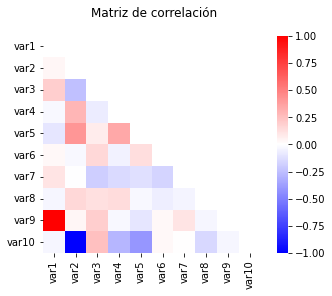

In [24]:
corrs = df.corr() #calcula las correlaciones entre cada par de variables (con pandas)
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
g = sns.heatmap(corrs, mask=mask, cmap='bwr', square=True, vmin=-1.0, vmax=1.0)
g.figure.suptitle('Matriz de correlación')
plt.show()

En este caso, el rojo representa correlación perfecta positiva (como entre las variables 1 y 9), mientras que el azul representa correlación perfecta negativa (como entre las variables 1 y 9).

Más opciones de configuración se pueden encontrar en https://seaborn.pydata.org/generated/seaborn.heatmap.html

## Gráficas para explorar relaciones bivariadas (IV)

Para presentar en un solo gráfico la relación entre varias variables comparadas con otra que es la variable a predecir.
En este ejemplo se utiliza una base de datos con orientación horizontal, se transformará en orientación vertical repitiendo la variable a predecir.
Aquí se utiliza una librería para hacer estadísticas muy útil, llamada Pingouin. Como no suele estar instalada por defecto, se pide que se instale antes de cargarla (!pip install pingouin).

In [25]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=d17e380517847b7b679722f86b97fb4bc52cb0bad60200abbf48695777765e92
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg #Para hacer estadísticas. Si no está instalado, en la consola poner pip install pingouin

#Cargar la base de datos de ejemplo
urlDatos='https://raw.githubusercontent.com/joselvira/BiomecanicaPython/master/Datos/BasesDatos/BaseDatosDianas_Fake.xlsx'
nombreHoja = 'DatosHorizontal'

dfDatos = pd.read_excel(urlDatos, sheet_name=nombreHoja, index_col=None)
#Para este ejemplo, nos quedamos únicamente con los resultados del pretest
dfDatos = dfDatos[['SujID',	'Grupo',	'Edad',	'Talla',	'Masa',	'Puntos_pre',	'Equilibrio_pre',	'Salto_pre']]
#quitamos un dato outlier
dfDatos['Puntos_pre'] = dfDatos[dfDatos['Puntos_pre']<100]['Puntos_pre']
dfDatos.head()

,SujID,Grupo,Edad,Talla,Masa,Puntos_pre,Equilibrio_pre,Salto_pre
0,1,Entrenado,13.508680,1.609190,53.265265,24.0,11.971867,21.572761
1,2,Entrenado,14.108241,1.614911,55.770581,31.0,11.103282,21.831651
2,3,Entrenado,15.127287,1.793211,59.538736,27.0,11.377356,21.788410
3,4,Entrenado,14.284315,1.804726,51.641111,22.0,12.275727,22.458442
4,5,Entrenado,13.285982,1.694118,56.992277,25.0,11.441037,22.107812


Ahora transformamos la base de datos. Imaginemos que queremos predecir la variable Puntos a partir de las variables Equilibrio y Salto. La variable Puntos se va a repetir para coincidir con cada una de las otras.

In [27]:
dfFactores = pd.melt(dfDatos, id_vars=['SujID', 'Grupo', 'Edad', 'Talla', 'Masa', 'Puntos_pre'], value_vars=['Equilibrio_pre',	'Salto_pre'], var_name='NomVariable', value_name='value')
dfFactores.head()

,SujID,Grupo,Edad,Talla,Masa,Puntos_pre,NomVariable,value
0,1,Entrenado,13.508680,1.609190,53.265265,24.0,Equilibrio_pre,11.971867
1,2,Entrenado,14.108241,1.614911,55.770581,31.0,Equilibrio_pre,11.103282
2,3,Entrenado,15.127287,1.793211,59.538736,27.0,Equilibrio_pre,11.377356
3,4,Entrenado,14.284315,1.804726,51.641111,22.0,Equilibrio_pre,12.275727
4,5,Entrenado,13.285982,1.694118,56.992277,25.0,Equilibrio_pre,11.441037


Ahora creamos el gráfico con la función lmplot de Seaborn.

/usr/local/lib/python3.9/dist-packages/seaborn/regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


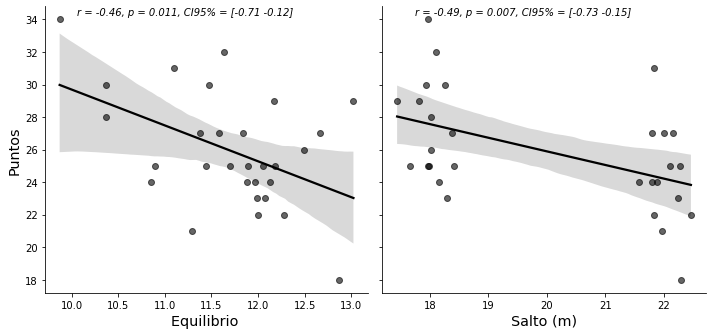

In [28]:
rc={'axes.labelsize': 'x-large', 'figure.figsize':(5,6), 'figure.dpi':300, }
with sns.plotting_context(rc=rc):
    g = sns.lmplot(data=dfFactores, x='value', y='Puntos_pre', hue='NomVariable', col='NomVariable', height=5, sharex=False,
                   line_kws={'color': 'k'},
                   scatter_kws={'color': 'k', 'alpha':0.6},
                   truncate=True)
    
    #quita los títulos de cada gráfica
    g.set_titles('')
    g.axes[0,0].set_ylabel('Puntos')
    
    #Ajusta los gráficos
    labels=['Equilibrio ',	'Salto (m)'] #nombre de las variables para etiquetas del eje horizontal
    vars= dfFactores['NomVariable'].unique() #nombre de las variables para calcular la correlación
    for i, ax in enumerate(g.axes.flat):
        #cambia las etiquetas del eje X
        ax.set_xlabel(labels[i])
        
        #calcula correlaciones y pone el texto
        resultCorr = pg.corr(x=dfDatos[vars[i]], y=dfDatos['Puntos_pre']) #Cuidado, aquí se coge el dataframe original con orientación horizontal
        ax.text(0.1, 0.97, 'r = {0:.2f}, p = {1:.3f}, CI95% = {2:}'.format(resultCorr['r'][0], resultCorr['p-val'][0], resultCorr['CI95%'][0]), fontstyle='italic', transform=ax.transAxes)
        
    #Guarda la figura    
    #g.savefig(rutaParaGuardar + r'\FiguraRegresionIsocin-FMax.png', dpi=300) #guarda la figura en la carpeta
    
    

# Gráficas de series temporales con distintas repeticiones

## Gráficas de patrón promedio (ensemble average) series temporales con distintas repeticiones

Normalmente utilizaríamos datos de series temporales con la evolución de alguna variable durante un tiempo. En este caso crearemos unos datos ficticios basados en ondas sinusoidales que simulen 10 repeticiones de un movimiento con cierta variabilidad.

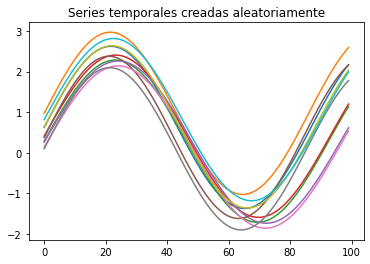

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1203) # para mantener la consistencia al crear los datos aleatorios

t = np.arange(0, 1.0, 1.0/100) #columna de tiempo, un segundo a 100 Hz

#Crea las condiciones de las ondas sinusoidales
numRepes=10
rango_of=[0,1]
rango_f=[1, 1.2]

#of=np.random.rand(numSerires)*(rango_of[1]-rango_of[0])+rango_of[0]
of=np.random.uniform(rango_of[0], rango_of[1], numRepes)
a=2 #amplitud
#f=np.random.rand(numSerires)*(rango_f[1]-rango_f[0])+rango_f[0]
f=np.random.uniform(rango_f[0], rango_f[1], numRepes)

DatosGraf = pd.DataFrame(np.array([of[i] + a*np.sin(2*np.pi*f[i]*t) for i in range(numRepes)]).T)

#Dibuja la gráfica para ver qué datos ha creado
fig, ax = plt.subplots()
plt.plot(DatosGraf)
plt.title('Series temporales creadas aleatoriamente')
plt.show()

Una vez tenemos los datos, creamos el gráfico con las medias y desviación típica instante a instante.

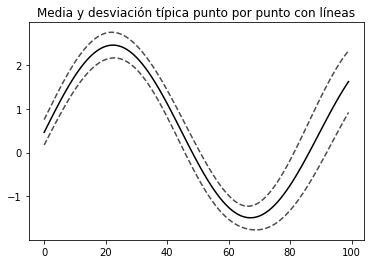

In [30]:
#Calcula la curva promedio de los dos conjuntos de datos punto por punto
curvProm=DatosGraf.mean(axis=1)

#Calcula la curva SD de los dos conjuntos de datos punto por punto
curvSD=DatosGraf.std(axis=1)

fig, ax = plt.subplots()
plt.plot(curvProm, 'k') #dibuja la línea central del promedio
plt.plot(curvProm-curvSD, 'k--', alpha=0.7)
plt.plot(curvProm+curvSD, 'k--', alpha=0.7)
plt.title('Media y desviación típica punto por punto con líneas')
plt.show()

Para comprobar cuánto abarcan las líneas de las desviaciones típicas, dibujamos las líneas de los datos originales y encima las de la media y desviaciones típicas.

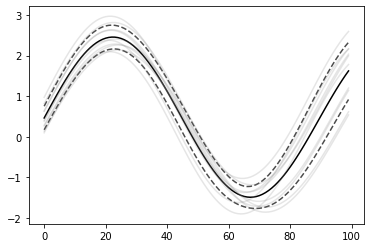

In [31]:
fig, ax = plt.subplots()
plt.plot(curvProm, 'k') #dibuja la línea central del promedio
plt.plot(curvProm-curvSD, 'k--', alpha=0.7) #promedio - SD
plt.plot(curvProm+curvSD, 'k--', alpha=0.7) #promedio + SD
plt.plot(DatosGraf, 'grey', alpha=0.2) #todas las líneas en gris claro
plt.show()

Ahora representamos el mismo tipo de gráfico pero con la zona de las desviaciones típicas sombreadas.

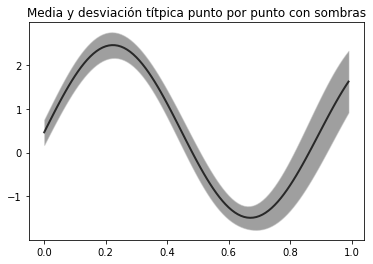

In [32]:
fig, ax = plt.subplots()
ax.plot(t, curvProm, 'k-', linewidth=2.0, alpha=0.75)
ax.fill_between(t, curvProm-curvSD, curvProm+curvSD, color='0.75', facecolor='0.25', alpha=0.5)

plt.title('Media y desviación títpica punto por punto con sombras')
plt.show()

## Gráfica de series temporales con distintas repeticiones de varios factores (ensemble average)

En este caso, tenemos un conjunto de datos con varias repeticiones de una misma variable, pero que se ejecuta de formas distintas según las condiciones de algún factor. Aunque podemos hacer las gráficas siguiendo el procedimiento anterior, también se puede realizar de una forma más simplificada utilizando la librería Seaborn.
En este ejemplo, vamos a analizar datos de fuerza vertical registrados durante una caída desde una altura sobre una plataforma de fuerzas. Tenemos dos condiciones en el experimento: caída con calzado y caída descalzo. Imaginemos que queremos visualizar si el calzado supone un cambio en el perfil de las fuerzas al realizar la recepción. Para ello vamos a representar en una gráfica todos los ensayos para tener una idea de qué está pasando.
En primer lugar importamos la base de datos.

In [33]:
import pandas as pd
import numpy as np

urlDatos='https://raw.githubusercontent.com/joselvira/BiomecanicaPython/master/Datos/BasesDatos/BaseDatosCaidasCalzado-Descalzo.xlsx'
nombreHoja = 'Hoja1'

dfDatos = pd.read_excel(urlDatos, sheet_name=nombreHoja, index_col=None,skiprows=1)
dfDatos.head()

,tiempo,C1,C2,C3,C4,C5,C6,D1,D2,D3,D4,D5,D6
0,0.000,0.730101,0.018738,0.003752,-0.003577,0.012049,-0.130856,0.422628,0.317697,0.129129,0.129086,0.532716,0.130117
1,0.001,0.628828,0.002236,0.003756,0.204561,0.574005,0.361467,0.428988,0.512810,0.208449,0.799580,0.715263,0.160612
2,0.002,0.806465,-0.004217,0.000937,0.814944,0.112552,0.301736,0.444010,0.688001,0.212746,1.410374,1.975003,0.383099
3,0.003,0.967941,-0.005653,-0.006099,-0.008915,0.259584,0.375975,0.446742,1.205023,0.238514,1.075329,1.975360,0.456019
4,0.004,1.005284,-0.009962,-0.013140,0.369048,0.575087,0.569312,0.449026,1.954973,0.276468,1.209931,1.443340,0.859848


La primera columna incluye el tiempo. Las siguientes incluyen la serie temporal de la repetición de cada uno de los seis participantes. Las primeras columnas corresponden a la condición calzado (C) y las últimas a la condición descalzo (D).
Los datos corresponden a la fuerza vertical en la caída, ya normalizados respecto al peso de cada participante. En este ejemplo el tiempo no está normalizado, pero en algunos casos puede ser conveniente normalizarlos para que todos los ensayos tengan el mismo número de datos.

Visualizar los datos siempre ayuda a mejorar la comprensión de lo que tenemos.

<AxesSubplot:title={'center':'Descalzos'}>

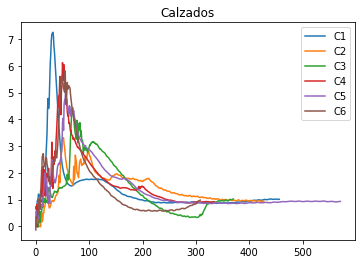

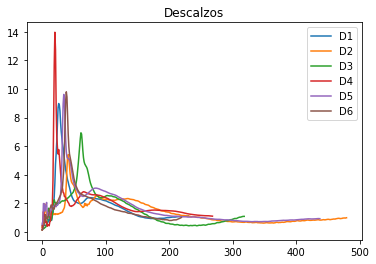

In [34]:
dfDatos.iloc[:, 1:7].plot(title='Calzados')
dfDatos.iloc[:, 7:].plot(title='Descalzos')

Lo siguiente será ordenar la base de datos para que tenga orientación vertical en lugar de horizontal, es decir, que se colocarán las series temporales unas debajo de otras como si fueran factores. Además se debe crear una columna nueva para identificar cada factor.

In [35]:
#Transforma los datos en columnas por factores
numColsPorCondicion = 6
dfFactores = pd.melt(dfDatos, id_vars='tiempo', value_vars=dfDatos.columns[1:], var_name='Participante', value_name='Fz')
#Añade la columna con la condición
cond=['Calzado', 'Descalzo']
dfFactores['Condicion']= np.repeat(cond, len(dfDatos)*numColsPorCondicion, axis=0)
print(dfFactores.head()) #imprime las primeras filas
print(dfFactores.tail()) #imprime las últimas filas

   tiempo Participante        Fz Condicion
0   0.000           C1  0.730101   Calzado
1   0.001           C1  0.628828   Calzado
2   0.002           C1  0.806465   Calzado
3   0.003           C1  0.967941   Calzado
4   0.004           C1  1.005284   Calzado
      tiempo Participante  Fz Condicion
7603   0.629           D6 NaN  Descalzo
7604   0.630           D6 NaN  Descalzo
7605   0.631           D6 NaN  Descalzo
7606   0.632           D6 NaN  Descalzo
7607   0.633           D6 NaN  Descalzo


Ahora ya podemos realizar las gráficas directamente con Seaborn.
En primer lugar, realizamos una gráfica en la que se incluyan todas las repeticiones, diferenciando por colores cada factor.



<AxesSubplot:xlabel='tiempo', ylabel='Fz'>

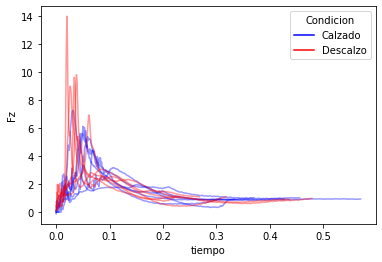

In [36]:
import seaborn as sns
#Con todos los datos
sns.lineplot(data=dfFactores, x='tiempo', y='Fz', hue='Condicion', units='Participante', palette=['b', 'r'], estimator=None, alpha=0.4)


También se puede representar el mismo gráfico diferenciando por sujetos.

<AxesSubplot:xlabel='tiempo', ylabel='Fz'>

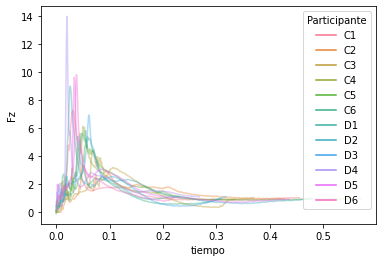

In [37]:
sns.lineplot(data=dfFactores, x='tiempo', y='Fz', hue='Participante', estimator=None, alpha=0.4)

Por último, realizamos un gráfico con la media de cada condición en forma de línea y un área sombreada que representa la desviación típica de todas las repeticiones.

<AxesSubplot:xlabel='tiempo', ylabel='Fz'>

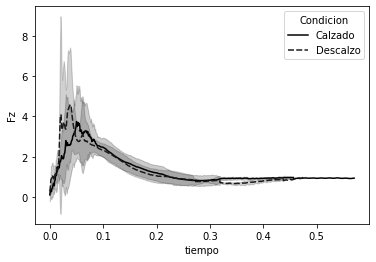

In [38]:
#Con medias en línea y desviación típica en sombra
sns.lineplot(data=dfFactores, x='tiempo', y='Fz', hue='Condicion', style='Condicion', palette=['k', [0.10,0.10,0.10]], ci='sd')

## Visualizar varias repeticiones de varios sujetos adaptando el formato

En este ejemplo se ve cómo se pueden ajustar una a una todas las gráficas creadas de forma masiva.

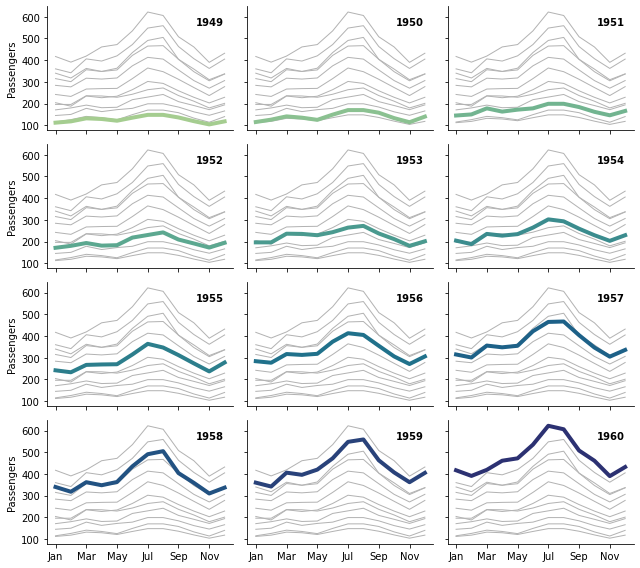

In [39]:
#Ejemplo de https://seaborn.pydata.org/examples/timeseries_facets.html
import seaborn as sns
flights = sns.load_dataset("flights")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=flights,
    x="month", y="passengers", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=flights, x="month", y="passengers", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Passengers")
g.tight_layout()

# Visualizar variables agrupadas por factores

Vamos a realizar un gráfico sofisticado agrupando por factores utilizando la librería Seaborn.
En primer lugar cargamos los datos.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

urlDatos='https://raw.githubusercontent.com/joselvira/BiomecanicaPython/master/Datos/BasesDatos/BaseDatosSaltoFactores_Fake.xlsx'
nombreHoja = 'Datos'

Datos = pd.read_excel(urlDatos, sheet_name=nombreHoja, index_col=None)
Datos.head()


,nº,Edad,Talla,Masa,Sexo,Grupo,Prepost,HCMJ,HSJ
0,1,23.794470,2.086830,74.274673,Hombre,Entrenado,pre,38.916430,48.380424
1,2,24.302798,1.871651,77.028427,Hombre,Entrenado,pre,39.853706,36.873923
2,3,23.041089,1.691582,75.242847,Hombre,Entrenado,pre,34.445890,39.361161
3,4,20.154899,1.758380,74.575467,Hombre,Entrenado,pre,44.264704,27.049540
4,5,20.179277,1.746612,75.645515,Hombre,Entrenado,pre,35.337067,35.277687


En este caso los datos ya tienen formato vertical por factores, por lo que no hay que reorientarlos. Una sola línea es suficiente para crear un gráfico directamente.

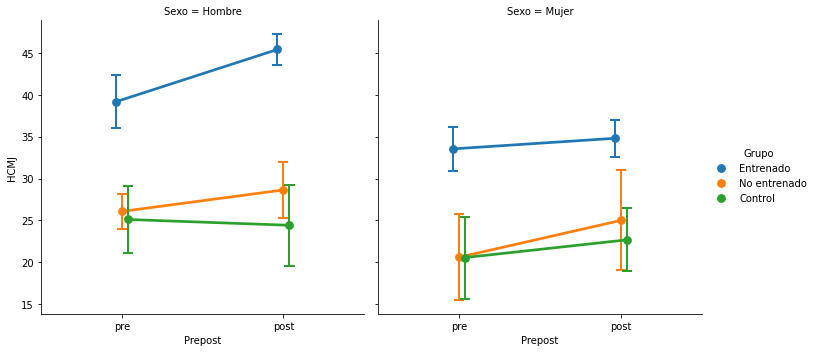

In [41]:
sns.catplot(data=Datos, x='Prepost', y='HCMJ', hue='Grupo', col='Sexo', ci='sd', kind='point', capsize=.05, errwidth=2, dodge=True)

Aunque también podemos mejorar considerablemente el aspecto.

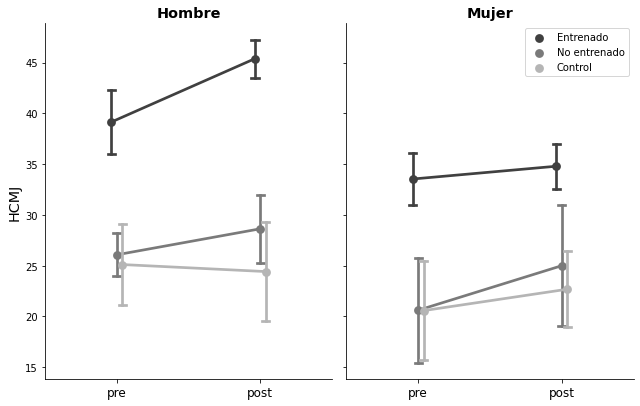

In [42]:
#Gráfico de factores
rc={'axes.labelsize': 'x-large', 'xtick.labelsize': 'large'}
with sns.plotting_context(rc=rc):  
    graycolors = sns.mpl_palette('Greys_r', 4) #paleta de grises, mejor para publicaciones en blanco y negro
    g = sns.catplot(x='Prepost', y='HCMJ', hue='Grupo', col='Sexo', data=Datos, ci='sd',
                               kind='point', capsize=.05, dodge=True, legend=False, palette=graycolors, height=6, aspect=.75)#1hue="Instrument", col="Skill", 
    g.set_titles('{col_name}', fontweight='bold') #para que quite el nombre del factor antes de la condición (Sexo = Hombre, Sexo = Mujer)
    g.set_axis_labels('', ) #quita el título general del eje X, ponía el nombre del factor (Prepost)
    
    plt.legend(loc='best')
plt.show()

Según interese, se puede modificar el orden de los factores, cambiar la separación en columnas, etc.

---



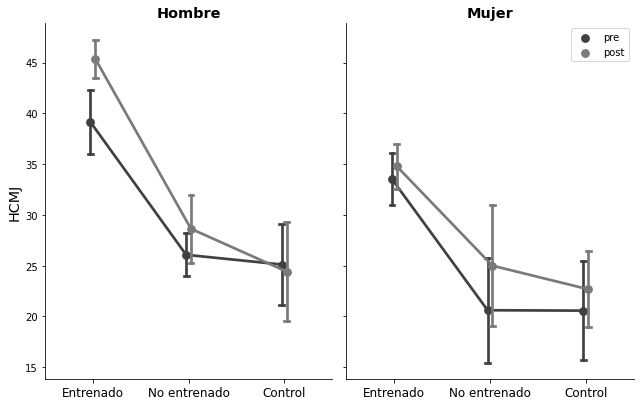

In [43]:
rc={'axes.labelsize': 'x-large', 'xtick.labelsize': 'large'} #aquí se ajustan las propiedades que se quiere que tengan partes específicas de la gráfica 
with sns.plotting_context(rc=rc):  
    graycolors = sns.mpl_palette('Greys_r', 4) #paleta de grises, mejor para publicaciones en blanco y negro
    g = sns.catplot(x='Grupo', y='HCMJ', hue='Prepost', col='Sexo', data=Datos, ci='sd',
                               kind='point', capsize=.05, dodge=True, legend=False, palette=graycolors, height=6, aspect=.75)#1hue="Instrument", col="Skill", 
    g.set_titles('{col_name}', fontweight='bold') #para que quite el nombre del factor antes de la condición (Sexo = Hombre, Sexo = Mujer)
    g.set_axis_labels('', ) #quita el título general del eje X, ponía el nombre del factor (Prepost)
    
    plt.legend(loc='best')
plt.show()

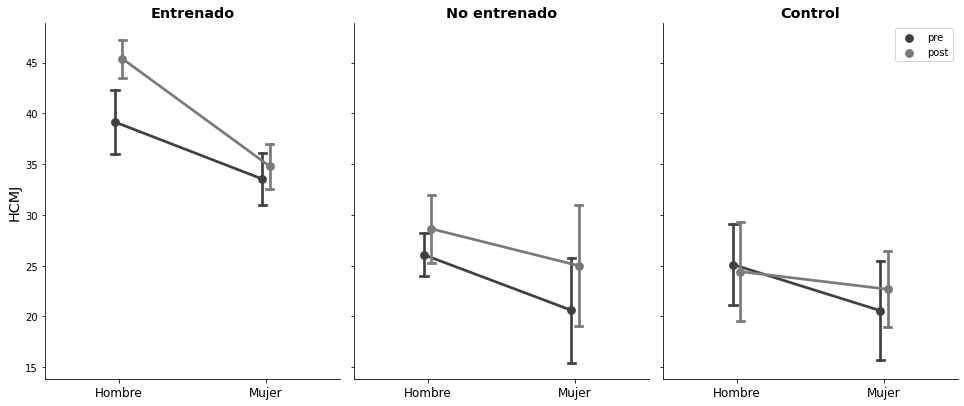

In [44]:
rc={'axes.labelsize': 'x-large', 'xtick.labelsize': 'large'}
with sns.plotting_context(rc=rc):  
    graycolors = sns.mpl_palette('Greys_r', 4) #paleta de grises, mejor para publicaciones en blanco y negro
    g = sns.catplot(x='Sexo', y='HCMJ', hue='Prepost', col='Grupo', data=Datos, ci='sd',
                               kind='point', capsize=.05, dodge=True, legend=False, palette=graycolors, height=6, aspect=.75)#1hue="Instrument", col="Skill", 
    g.set_titles('{col_name}', fontweight='bold') #para que quite el nombre del factor antes de la condición (Sexo = Hombre, Sexo = Mujer)
    g.set_axis_labels('', ) #quita el título general del eje X, ponía el nombre del factor (Prepost)
    
    plt.legend(loc='best')
plt.show()

Una forma interesante de presentar los datos es combinando boxplot con strip plot.

A menos de momento, hay que hacerlo juntando dos gráficas por separado.


Text(0.5, 0, '')

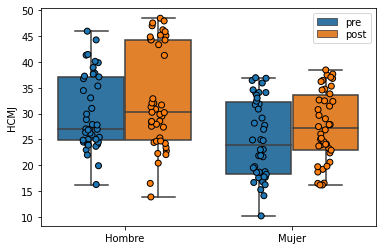

In [45]:
params = dict(data=Datos,
              x='Sexo',
              y='HCMJ',
              hue='Prepost',
              dodge=True)
g = sns.stripplot(edgecolor='black', linewidth=1, **params, size=6)
g_box = sns.boxplot(**params)

#Configura la leyenda
handles,labels = g.get_legend_handles_labels()
plt.legend(handles[2:],
           labels[2:],
           #bbox_to_anchor = (.3,.95),
           fontsize = 10,
           markerscale = 1,
           frameon=True,
           labelspacing=0.2)
plt.xlabel('') #quita el nombre del factor del eje X